环状条形图(Circular barplot)是条形图的变体，图如其名，环状条形图在视觉上很吸引人，但也必须小心使用，因为环状条形图使用的是极坐标系而不是笛卡尔坐标系，每一个类别不共享相同的Y轴。环状条形图非常适合于周期性数据，本文主要介绍基于R语言实现环状条形图的绘制。本文主要参考链接:[Circular barplot](https://www.r-graph-gallery.com/circular-barplot.html)


R语言的环状条形图主要基于tidyverse包实现，tidyverse是一组R包的集合，这些R包共享共同的原理并旨在无缝地协同工作，具体介绍见：
[tidyverse](https://github.com/tidyverse)

安装命令如下：
> install.packages("tidyverse")

本文所有代码见：[R-Study-Notes](https://github.com/luohenyueji/R-Study-Notes/tree/master/Visualization)

# 1 基础环状条形图绘制 Basic circular barplot
## 1.1 最基础环状条形图的绘制 Most basic circular barplot
环状条形图就是条形图，只不过环状条形图沿圆形而不是直线显示。
输入数据集与条形图的输入数据集相同：每个组需要一个数值（一个组=一个条形图）。（请参阅条形图部分的更多说明）。
基本上，这个方法和做一个经典的条形图是一样的。最后，我们调用coord_polar()使整个坐标系变为极坐标系，这样会使得图表呈圆形。注意，ylim()参数非常重要。如果它从0开始，这些条将从圆的中心开始。如果您提供负值，将出现一个白色的圆圈空格！此外会用到rep函数，具体介绍见[R中rep函数的使用](https://www.cnblogs.com/business-analysis/p/3414997.html)



In [19]:
# Libraries
# 导入包
library(tidyverse)
 
# Create dataset
# 创建数据
data <- data.frame(
  id=seq(1,60),
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
head(data)

id,individual,value
<int>,<fct>,<int>
1,Mister 1,44
2,Mister 2,79
3,Mister 3,81
4,Mister 4,62
5,Mister 5,91
6,Mister 6,50


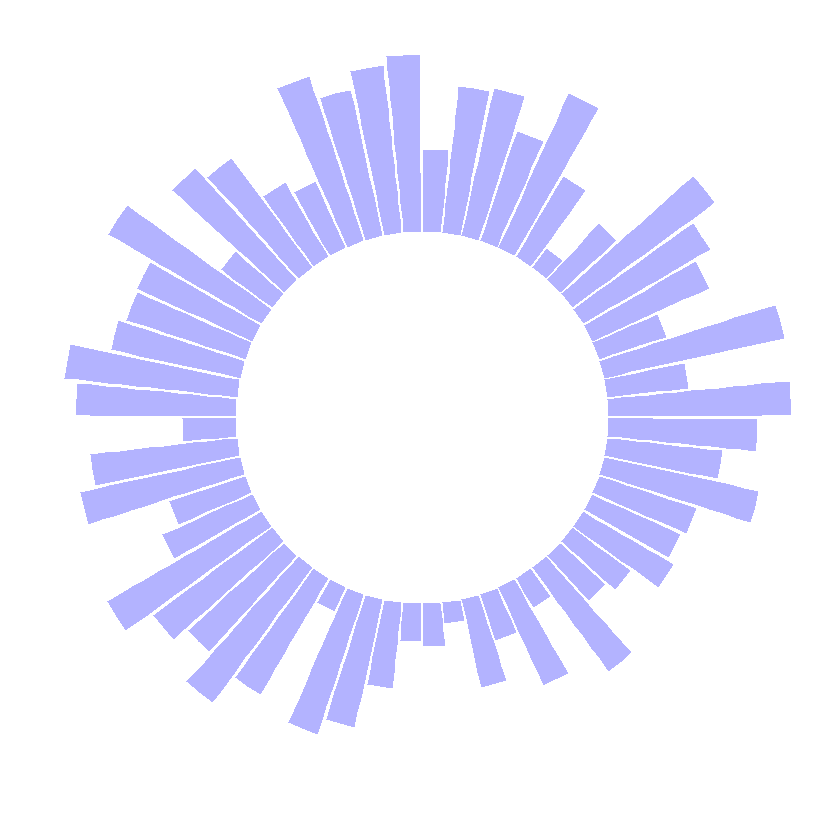

In [20]:
# Make the plot
# 画图
p <- ggplot(data, aes(x=as.factor(id), y=value)) +       
    # This add the bars with a blue color
    # 添加蓝色条形，stat表示数据统计方式，也就是说identity提取横坐标x对应的y值
    geom_bar(stat="identity", fill=alpha("blue", 0.3)) +
    # The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
    # 设置y的范围，负值设定内圆的大小，正值设定各个条柱的最高高度
    ylim(-100,120)+
    # theme_minimal简约主题
    theme_minimal() +
    # Custom the theme: no axis title and no cartesian grid
    # 自定义主题
    theme(
        # 移除标题坐标文字
        axis.text = element_blank(),
        axis.title = element_blank(),
        # 移除网格
        panel.grid = element_blank(),
        # This remove unnecessary margin around plot
        # 移除不必要空白
        plot.margin = unit(rep(-2,4), "cm"))+
    # This makes the coordinate polar instead of cartesian.
    # 使用极坐标系
    coord_polar(start = 0)
p

## 1.2 给环状条形图添加标签 Add labels to circular barplot

上节说明了如何制作基本的环状条形图。下一步是在每个条上添加标签，以便深入了解图形。这里我建议一种方法，在每个条的顶部添加标签，使用与条中心部分相同的角度。在下面的代码中，有一小段创建了一个带有每个标签特性的数据帧，然后我们可以在geom_text（）中调用它。
请注意，为了让标签的更好阅读，这就需要将其中一些标签翻转180度。

**首先添加数据**

In [21]:
# Libraries
library(tidyverse)
 
# Create dataset
# 创建数据
data <- data.frame(
  id=seq(1,60),
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
# ----- This section prepare a dataframe for labels ---- #
# 准备数据标签
# Get the name and the y position of each label
label_data <- data
# calculate the ANGLE of the labels
# 计算标签角度
number_of_bar <- nrow(label_data)
number_of_bar

# I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
# 减去0.5是为了让标签位于条柱中心
# angle是标签角度
angle <-  90 - 360 * (label_data$id-0.5) /number_of_bar 

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
# 判断标签左对齐还是右对齐，也就是标签是朝向左边还是右边
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
# 翻转标签
label_data$angle<-ifelse(angle < -90, angle+180, angle)
# ----- ------------------------------------------- ---- #
head(label_data)

[1] 60

id,individual,value,hjust,angle
<int>,<fct>,<int>,<dbl>,<dbl>
1,Mister 1,86,0,87
2,Mister 2,81,0,81
3,Mister 3,27,0,75
4,Mister 4,48,0,69
5,Mister 5,57,0,63
6,Mister 6,49,0,57


**开始绘图**

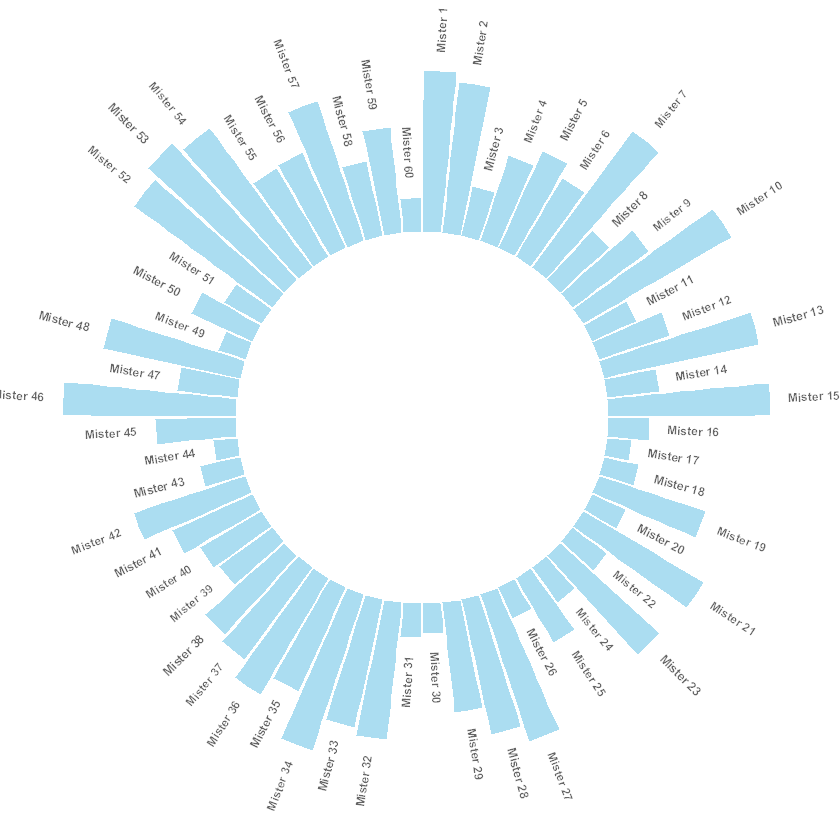

In [22]:

# Start the plot
# 开始绘图
p <- ggplot(data, aes(x=as.factor(id), y=value)) +   
    # This add the bars with a bskyblue color
    # 添加蓝色条形，stat表示数据统计方式，也就是说identity提取横坐标x对应的y值
    geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +

    # The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
    # 设置y的范围，负值设定内圆的大小，正值设定各个条柱的最高高度
    ylim(-100,120)+

    # theme_minimal简约主题
    theme_minimal() +
    # Custom the theme: no axis title and no cartesian grid
    # 自定义主题
    theme(
        # 移除标题坐标文字
        axis.text = element_blank(),
        axis.title = element_blank(),
        # 移除网格
        panel.grid = element_blank(),
        # This remove unnecessary margin around plot
        # 移除不必要空白
        plot.margin = unit(rep(-2,4), "cm"))+

    # This makes the coordinate polar instead of
    # 设置极坐标系
    coord_polar(start = 0) +

    # Add the labels, using the label_data dataframe that we have created before
    # 添加标签
    geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 

p

# 2 分组环状条形图 Circular barplot with groups


## 2.1 在圆中添加间隙 Add a gap in the circle
本节主要介绍在圆中添加间隙，其实大部分操作和上一节一样，只是在初始数据帧的末尾添加了几行空行就能添加间隙

**添加数据**

In [23]:
# library
library(tidyverse)
 
# Create dataset
# 添加数据
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar'
# 设置空白柱的个数
empty_bar <- 10
 
# 在原始数据中添加空白数据
# Add lines to the initial dataset
to_add <- matrix(NA, empty_bar, ncol(data))
colnames(to_add) <- colnames(data)
data <- rbind(data, to_add)
data$id <- seq(1, nrow(data))

# Get the name and the y position of each label
# 和上一步一样，获得标签角度信息
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar   
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
head(label_data)

individual,value,id,hjust,angle
<fct>,<int>,<int>,<dbl>,<dbl>
Mister 1,18,1,0,87.42857
Mister 2,55,2,0,82.28571
Mister 3,69,3,0,77.14286
Mister 4,36,4,0,72.00000
Mister 5,46,5,0,66.85714
Mister 6,82,6,0,61.71429


**绘图**

Warning message:
"Removed 10 rows containing missing values (position_stack)."
Warning message:
"Removed 10 rows containing missing values (geom_text)."


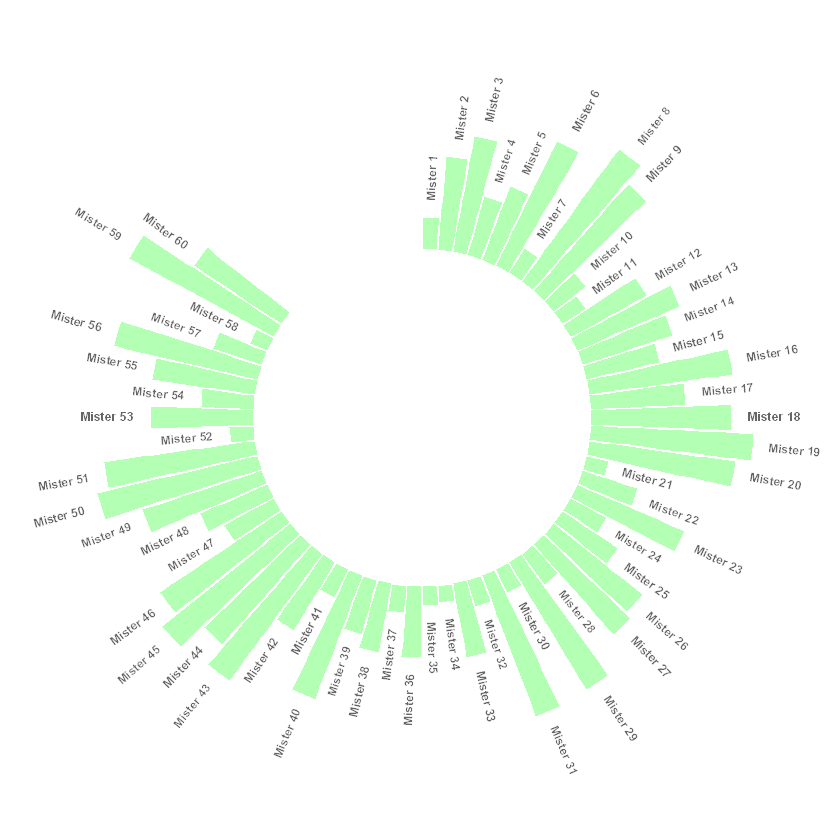

In [24]:
# Make the plot
# 绘图
p <- ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", fill=alpha("green", 0.3)) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar(start = 0) + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p;

## 2.2 组间距设置 Space between groups
组间距就是在各个组之间添加若干个空白柱，本节代码会用到R语言管道，具体介绍[R语言中的管道%>%](https://www.jianshu.com/p/c65dbce983dd)

**首先创建一个空白数组**

In [25]:
# library
library(tidyverse)
 
# Create dataset
# 创建数据集
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)

# Set a number of 'empty bar' to add at the end of each group
# 在原始数据中添加空白数据
# empty_bar 表示组之间的空白距离
empty_bar <- 4
# 每一组之间4个空白
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) <- colnames(data)
# 为每个空白值提供组信息，rep函数的意思就是复制值，levels(data$group)为复制的对象，each为复制的次数
to_add$group <- rep(levels(data$group), each=empty_bar)
head(to_add)

individual,group,value
<lgl>,<chr>,<lgl>
NA,A,NA
NA,A,NA
NA,A,NA
NA,A,NA
NA,B,NA
NA,B,NA


**然后将空白数组与原始数据绑定**

In [26]:
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar)
data <- rbind(data, to_add)
# 管道操作类似 data<-arrange(data,data$group)
data <- data %>% arrange(group)
# 设置id
data$id <- seq(1, nrow(data))
head(data)

individual,group,value,id
<fct>,<fct>,<int>,<int>
Mister 1,A,79,1
Mister 2,A,20,2
Mister 3,A,67,3
Mister 4,A,47,4
Mister 5,A,78,5
Mister 6,A,50,6


**绘图**

Warning message:
"Removed 16 rows containing missing values (position_stack)."
Warning message:
"Removed 16 rows containing missing values (geom_text)."


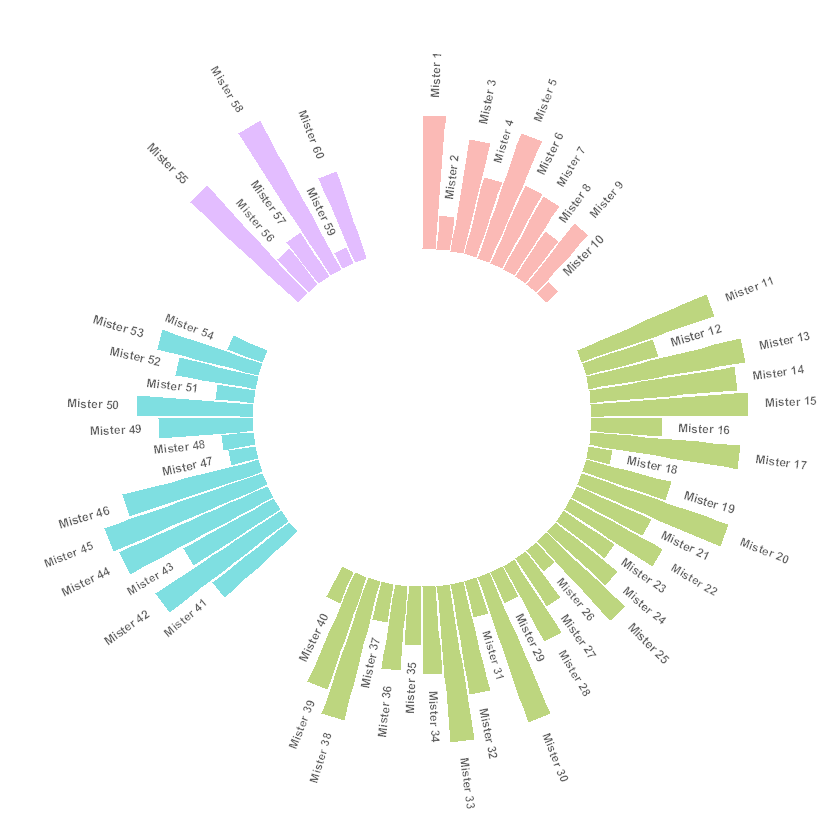

In [27]:
# Get the name and the y position of each label
# 设定角度值
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar    
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# Make the plot
# fill 按组填充颜色
p <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +   
  geom_bar(stat="identity", alpha=0.5) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
p

## 2.3 对柱状进行排序 Order bars
在这里，观察结果是按每个组内的条形高度排序的。如果您的目标是了解组内和组间的最高/最低观察值是什么，那么这将非常有用。在上一节中修改一行代码即可：
```
# data = data %>% arrange(group)
# 修改为
data = data %>% arrange(group, value)
```

individual,group,value
<lgl>,<chr>,<lgl>
NA,A,NA
NA,A,NA
NA,A,NA
NA,A,NA
NA,B,NA
NA,B,NA


individual,group,value,id
<fct>,<fct>,<int>,<int>
Mister 1,A,20,1
Mister 10,A,20,2
Mister 7,A,24,3
Mister 4,A,30,4
Mister 3,A,49,5
Mister 8,A,64,6


Warning message:
"Removed 16 rows containing missing values (position_stack)."
Warning message:
"Removed 16 rows containing missing values (geom_text)."


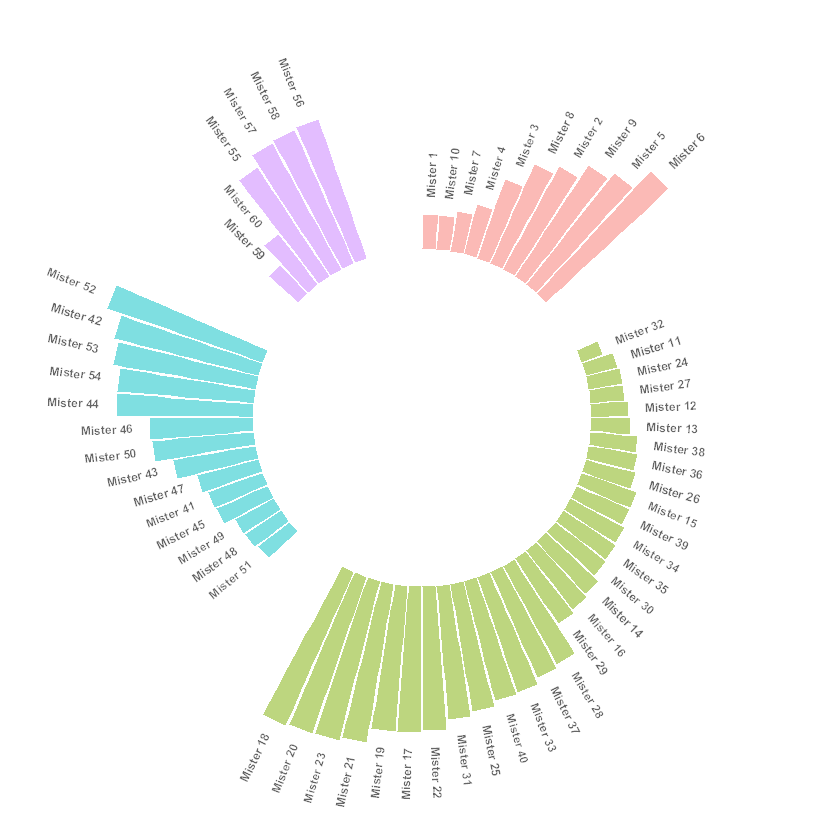

In [28]:
# library
library(tidyverse)
 
# Create dataset
# 创建数据集
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)

# Set a number of 'empty bar' to add at the end of each group
# 在原始数据中添加空白数据
# empty_bar 表示组之间的空白距离
empty_bar <- 4
# 每一组之间4个空白
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) <- colnames(data)
# 为每个空白值提供组信息，rep函数的意思就是复制值，levels(data$group)为复制的对象，each为复制的次数
to_add$group <- rep(levels(data$group), each=empty_bar)
head(to_add)

colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar)
data <- rbind(data, to_add)
# 管道操作类似 data<-arrange(data,data$group)
data <- data %>% arrange(group, value)
# 设置id
data$id <- seq(1, nrow(data))
head(data)

# Get the name and the y position of each label
# 设定角度值
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar    
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# Make the plot
# fill 按组填充颜色
p <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +   
  geom_bar(stat="identity", alpha=0.5) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
p

## 2.4 环状条形图自定义 Circular barchart customization
最后是，在图表中添加一些自定义项是非常明智的。这里我们添加组名（A、B、C和D），并添加一个刻度来帮助比较条形图的大小。代码有点长，但结果看来是值得的！

**首先准备数据**

In [29]:
# library
library(tidyverse)
 
# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))

# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar   
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
head(label_data)

individual,group,value,id,hjust,angle
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>
Mister 1,A,38,1,0,87.5
Mister 2,A,24,2,0,82.5
Mister 3,A,72,3,0,77.5
Mister 4,A,47,4,0,72.5
Mister 5,A,96,5,0,67.5
Mister 6,A,86,6,0,62.5


**然后设置abcd刻度线信息**

In [30]:
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
head(base_data)

group,start,end,title
<fct>,<int>,<dbl>,<dbl>
A,1,10,5.5
B,14,43,28.5
C,47,60,53.5
D,64,69,66.5


**接着设置各组之间的间隔条**

In [31]:
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
grid_data

group,start,end,title
<fct>,<dbl>,<dbl>,<dbl>
B,13,11,28.5
C,46,44,53.5
D,63,61,66.5


**最后就是绘图**

Warning message:
"Removed 12 rows containing missing values (position_stack)."
Warning message:
"Removed 12 rows containing missing values (geom_text)."


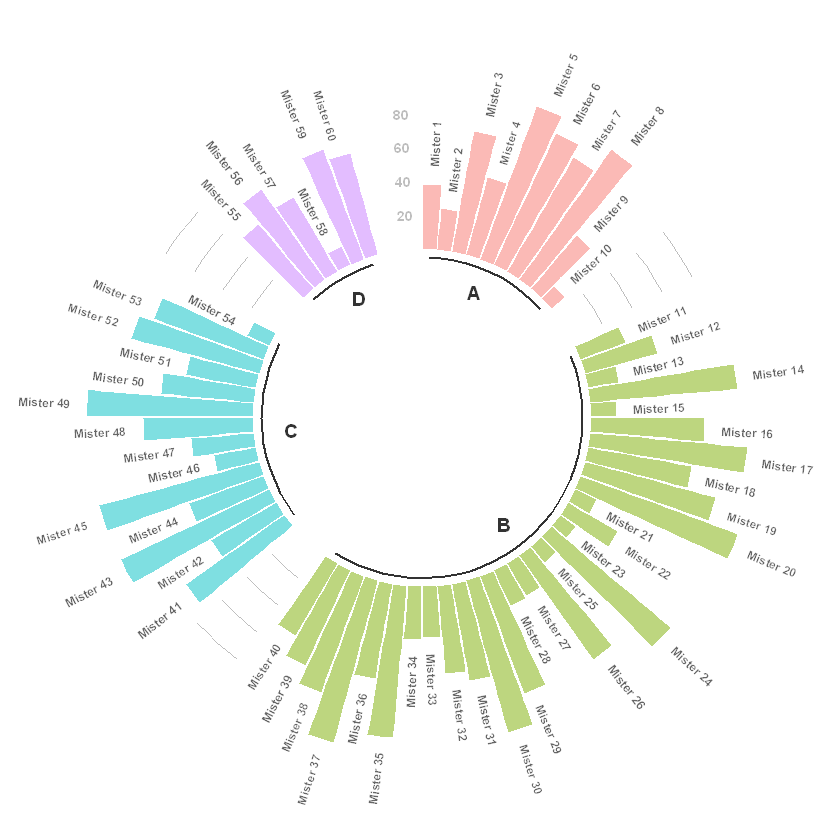

In [32]:
# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +   
    # 添加条形图
    geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +

    # 添加各组之间的线条，可以注释
    geom_segment(data=grid_data, aes(x = end, y = 80, xend = start, yend = 80), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
    geom_segment(data=grid_data, aes(x = end, y = 60, xend = start, yend = 60), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
    geom_segment(data=grid_data, aes(x = end, y = 40, xend = start, yend = 40), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
    geom_segment(data=grid_data, aes(x = end, y = 20, xend = start, yend = 20), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +

    # Add text showing the value of each 100/75/50/25 lines，设置值坐标，可以注释
    annotate("text", x = rep(max(data$id),4), y = c(20, 40, 60, 80), label = c("20", "40", "60", "80") , color="grey", size=3 , angle=0, fontface="bold", hjust=1) +
    
    # 和前面一样
    ylim(-100,120) +
    theme_minimal() +
    theme(
        legend.position = "none",
        axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.margin = unit(rep(-1,4), "cm") 
    ) +
    coord_polar() + 
    geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) +

    # Add base line information
    # 添加下划线
    geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
    # 添加各组的名字
    geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)
p

# 3 堆积环状条形图 Circular stacked barplot
本节旨在教你如何制作分组堆积的环状条形图。我强烈建议在深入研究这个代码之前先阅读前面的代码。本节会用到gather函数来处理数据，gather函数类似excel中的透视表，将数据压平。具体使用见
[R语言 tidyr包的三个重要函数：gather，spread，separate的用法和举例](https://blog.csdn.net/six66667/article/details/84888644)

该段代码和前面不同在于数据创建以及创建各组之间的间距条

**首先创建数据集**

In [33]:
# library
library(tidyverse)
library(viridis)
 
# Create dataset
# 创建数据集
data <- data.frame(
    individual=paste( "Mister ", seq(1,60), sep=""),
    group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
    value1=sample( seq(10,100), 60, replace=T),
    value2=sample( seq(10,100), 60, replace=T),
    value3=sample( seq(10,100), 60, replace=T)
)
head(data)

individual,group,value1,value2,value3
<fct>,<fct>,<int>,<int>,<int>
Mister 1,A,44,70,62
Mister 2,A,86,75,31
Mister 3,A,18,56,61
Mister 4,A,20,64,99
Mister 5,A,62,66,44
Mister 6,A,43,50,31


**转换数据**

In [34]:
# Transform data in a tidy format (long format)
# key表示观察的变量就是value1,value2,value3;value代表值,-c(1,2)表示不对第一列和第二列进行转换
data <- data %>% gather(key = "observation", value="value", -c(1,2)) 
head(data)
dim(data)

individual,group,observation,value
<fct>,<fct>,<chr>,<int>
Mister 1,A,value1,44
Mister 2,A,value1,86
Mister 3,A,value1,18
Mister 4,A,value1,20
Mister 5,A,value1,62
Mister 6,A,value1,43


[1] 180   4

**设置一系列绘图指标**

In [35]:
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2
nObsType <- nlevels(as.factor(data$observation))
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group)*nObsType, ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar*nObsType )
data <- rbind(data, to_add)
data <- data %>% arrange(group, individual)
data$id <- rep( seq(1, nrow(data)/nObsType) , each=nObsType)
 
# Get the name and the y position of each label
label_data <- data %>% group_by(id, individual) %>% summarize(tot=sum(value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]

Warning message:
"Factor `individual` contains implicit NA, consider using `forcats::fct_explicit_na`"


**绘图**

Warning message:
"Removed 24 rows containing missing values (position_stack)."
Warning message:
"Removed 9 rows containing missing values (geom_text)."
Warning message:
"Removed 24 rows containing missing values (position_stack)."
Warning message:
"Removed 9 rows containing missing values (geom_text)."


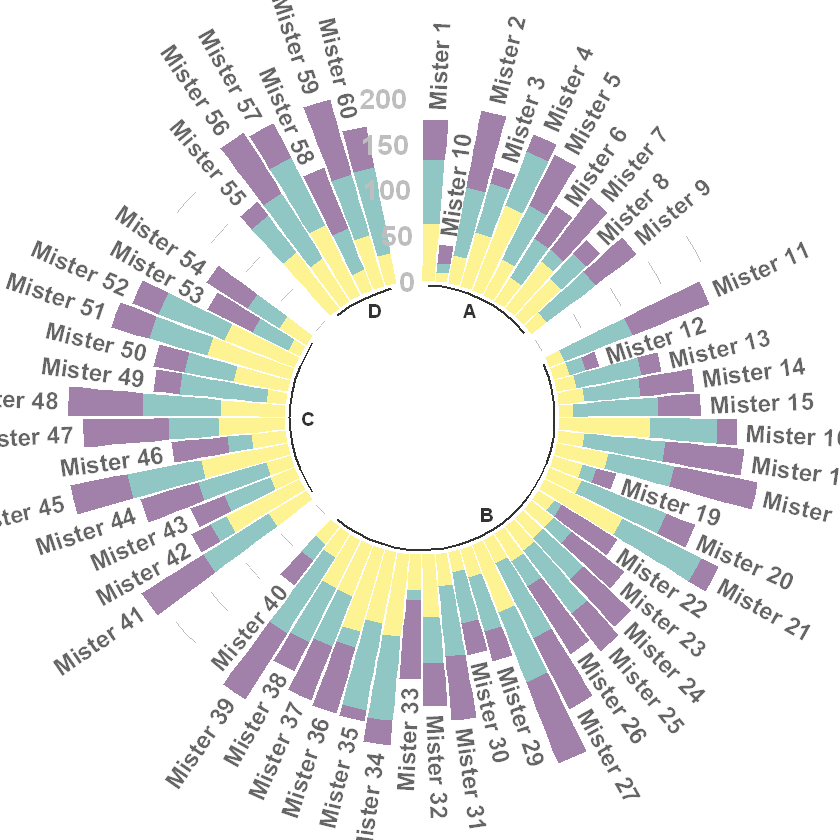

In [36]:

# Make the plot
p <- ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=as.factor(id), y=value, fill=observation), stat="identity", alpha=0.5) +
  scale_fill_viridis(discrete=TRUE) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 50, xend = start, yend = 50), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 100, xend = start, yend = 100), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 150, xend = start, yend = 150), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 200, xend = start, yend = 200), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  ggplot2::annotate("text", x = rep(max(data$id),5), y = c(0, 50, 100, 150, 200), label = c("0", "50", "100", "150", "200") , color="grey", size=6 , angle=0, fontface="bold", hjust=1) +
  
  ylim(-150,max(label_data$tot, na.rm=T)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  
  # Add labels on top of each bar
  geom_text(data=label_data, aes(x=id, y=tot+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)

p
# 保存数据 Save at png
ggsave(p, file="output.png", width=10, height=10)

# 4 参考
+ [Circular barplot](https://www.r-graph-gallery.com/circular-barplot.html)
+ [tidyverse](https://github.com/tidyverse)
+ [R中rep函数的使用](https://www.cnblogs.com/business-analysis/p/3414997.html)
+ [R语言中的管道%>%](https://www.jianshu.com/p/c65dbce983dd)
+ [R语言 tidyr包的三个重要函数：gather，spread，separate的用法和举例](https://blog.csdn.net/six66667/article/details/84888644)